In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [132]:
# data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# !wget $data -O data_wk3.csv 

In [133]:
df = pd.read_csv("data_wk3.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Preparation

In [134]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [135]:
obj_list = list(df.dtypes[df.dtypes == "object"].index)
for c in obj_list:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [136]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')
df.totalcharges = df.totalcharges.fillna(df.totalcharges.median())

In [137]:
df.churn = (df.churn == "yes").astype(int)

In [138]:
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,0
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,0
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,0
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.60,1


# Validation Framework

In [139]:
from sklearn.model_selection import train_test_split
df_full_train,df_test = train_test_split(df, test_size = 0.2, random_state =1)
df_train,df_val = train_test_split(df_full_train, test_size = 0.25, random_state =1)

In [140]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [141]:
y_train = df_train.churn
y_val = df_val.churn
y_test = df_test.churn

In [142]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# EDA

In [143]:
df_full_train = df_full_train.reset_index(drop = True)

In [144]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [145]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [146]:
numerical = ['tenure','monthlycharges','totalcharges']

categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [147]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# Feature Importance

In [148]:
global_churn = df_full_train.churn.mean()

In [149]:
df_full_train["gender"].unique().tolist()

['male', 'female']

In [150]:
interesting_list = []

for column in categorical:
    
    categories = df_full_train[column].unique().tolist()
    for category in categories:
        
        cat_churn = df_full_train[df_full_train[column] == category].churn.mean()
        if abs(cat_churn-global_churn) >= global_churn * 0.5:
            interesting_list.append(column)

In [151]:
set(interesting_list)

{'contract',
 'deviceprotection',
 'internetservice',
 'onlinebackup',
 'onlinesecurity',
 'paymentmethod',
 'seniorcitizen',
 'streamingmovies',
 'streamingtv',
 'techsupport'}

In [152]:
from sklearn.metrics import mutual_info_score

In [153]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [154]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# Feature Importance

In [155]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.197006
dtype: float64

# One-hot Encoding

In [156]:
from sklearn.feature_extraction import DictVectorizer

In [157]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [158]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,yes,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,yes,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,no,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,yes,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55
4221,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,no,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80
4222,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,no,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05
4223,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95


# Logistic Regression

In [159]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [160]:
z = np.linspace(-5,5,51)

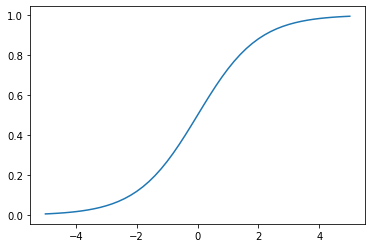

In [161]:
plt.plot(z,sigmoid(z))

In [162]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result +xi[j] * w[j]
        
    return result

def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    
    return result

# Train Logistic Regression

In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
model =LogisticRegression(solver='lbfgs', max_iter = 150 ,random_state = 1)

model.fit(X_train,y_train)

LogisticRegression(max_iter=150, random_state=1)

In [165]:
y_pred = model.predict_proba(X_val)

In [166]:
len(df_val[(y_pred[:,1] >= 0.5) == y_val])/len(df_val)

0.8041163946061036

In [167]:
df_pred = pd.DataFrame()
df_pred['probability'] =  y_pred[:,1]
df_pred['prediction'] = (y_pred[:,1] >= 0.5).astype(int)
df_pred['actual'] = y_val
df_pred['cor'] = df_pred['prediction'] == df_pred['actual']

In [168]:
df_pred

,probability,prediction,actual,cor
0,0.009158,0,0,True
1,0.202858,0,0,True
2,0.211082,0,0,True
3,0.542320,1,1,True
4,0.212450,0,0,True
...,...,...,...,...
1404,0.316174,0,0,True
1405,0.039850,0,1,False
1406,0.135907,0,0,True
1407,0.801222,1,1,True


In [169]:
df_pred['cor'].mean()

0.8041163946061036

# Model Interpretation

In [170]:
dic = dict(zip(dv.get_feature_names(),model.coef_[0].round(3)))
dic

C:\Users\rolly\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.472,
 'contract=one_year': -0.177,
 'contract=two_year': -0.405,
 'dependents=no': -0.029,
 'dependents=yes': -0.081,
 'deviceprotection=no': 0.061,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.082,
 'gender=female': -0.036,
 'gender=male': -0.074,
 'internetservice=dsl': -0.337,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.259,
 'multiplelines=no_phone_service': 0.137,
 'multiplelines=yes': 0.012,
 'onlinebackup=no': 0.061,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.082,
 'onlinesecurity=no': 0.265,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.286,
 'paperlessbilling=no': -0.234,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.167,
 'partner=yes': 0.057,
 'paymentmethod=bank_transfer_(automatic)': -0.088,
 'paymentmethod=credit_card_(automatic)': -0.034,
 'paymentmethod=electronic_check': 0.072,

In [171]:
small = ['contract','tenure','monthlycharges']

In [172]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [173]:
dv_small = DictVectorizer(sparse = False)
df_small = dv_small.fit(dicts_train_small)

In [174]:
X_train_small = dv_small.fit_transform(dicts_train_small)
X_val_small = dv_small.fit_transform(dicts_val_small)

In [175]:
model_small = LogisticRegression(solver='lbfgs', max_iter = 150, random_state = 1)

In [176]:
model_small.fit(X_train_small,y_train)

LogisticRegression(max_iter=150, random_state=1)

In [177]:
w0 = model_small.intercept_[0]
w0

-2.4767756593105

In [178]:
w = model_small.coef_[0].round(3)
w

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [179]:
dic_small = dict(zip(dv_small.get_feature_names(),model_small.coef_[0].round(3)))
dic_small

C:\Users\rolly\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

# Using the model

In [209]:
dict_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dict_test = df_test[categorical + numerical].to_dict(orient='records')
y_full_train = df_full_train.churn.values

In [210]:
dv = DictVectorizer(sparse=False)

In [211]:
X_train_full = dv.fit_transform(dict_full_train)
X_test = dv.fit_transform(dict_test)

In [236]:
model = LogisticRegression(solver='lbfgs', max_iter = 250)

In [237]:
model.fit(X_train_full,y_full_train)

LogisticRegression(max_iter=250)

In [242]:
y_pred = model.predict_proba(X_test)[:,1] >= 0.5

In [243]:
(y_pred == y_test).sum()/len(df_test)

0.8076650106458482

In [244]:
(y_pred == y_test).mean()

0.8076650106458482